#STEP 1:
#DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
file_path = '/content/Data_Cortex_Nuclear.csv'
df = pd.read_csv(file_path)

# Step 1: Handling Missing Values

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numeric columns using mean imputation
mean_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = mean_imputer.fit_transform(df[numeric_cols])

# For demonstration, KNN imputation can also be applied (uncomment below lines if needed)
# knn_imputer = KNNImputer(n_neighbors=5)
# df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

# Step 2: Normalization/Scaling

# Initialize StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 3: Encoding Categorical Variables

# Exclude 'class' from categorical columns as it is the target variable
categorical_cols = categorical_cols.drop('class')

# Initialize OneHotEncoder and fit_transform
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_categorical_data = encoder.fit_transform(df[categorical_cols])

# Create DataFrame with encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded categorical data
df.drop(columns=categorical_cols, inplace=True)
df = pd.concat([df, encoded_categorical_df], axis=1)

# Separate features and target
features = df.drop(columns=['class'])
labels = df['class']

# Display the first few rows of the preprocessed DataFrame
print(features.head())
print(labels.head())

# Save the preprocessed data to CSV (optional)
features.to_csv('/content/preprocessed_features.csv', index=False)
labels.to_csv('/content/preprocessed_labels.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.312711  0.517934  2.253669  1.497362  2.304365 -0.345019 -0.158601   
1  0.356798  0.286501  1.880279  1.420009  1.976769 -0.518126 -0.334523   
2  0.334966  0.450465  2.012928  1.124860  1.909149 -0.581298 -0.226891   
3  0.065474 -0.000103  0.802123  0.489481  1.219245 -0.247424 -0.199461   
4  0.036682  0.001305  0.805692  0.197652  0.939202 -0.482759 -0.304516   

   pCAMKII_N   pCREB_N    pELK_N  ...  MouseID_J3295_3  MouseID_J3295_4  \
0  -0.899902  0.604115  0.691475  ...              0.0              0.0   
1  -0.963018  0.442658  0.359831  ...              0.0              0.0   
2  -0.969835  0.543335  0.284600  ...              0.0              0.0   
3  -1.071196 -0.171236  0.357061  ...              0.0              0.0   
4  -1.085341 -0.627671  0.162107  ...              0.0              0.0   

   MouseID_J3295_5  MouseID_J3295_6  MouseID_J3295_7  MouseID_J3295_8  \
0              0.0       

#STEP 2

#EDA

Summary Statistics:
            DYRK1A_N       ITSN1_N        BDNF_N         NR1_N        NR2A_N  \
count  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03   
mean   2.171103e-16 -1.907939e-16  5.921189e-16 -6.579099e-16 -1.315820e-17   
std    1.000463e+00  1.000463e+00  1.000463e+00  1.000463e+00  1.000463e+00   
min   -1.126894e+00 -1.480026e+00 -4.136750e+00 -2.787944e+00 -2.261607e+00   
25%   -5.530238e-01 -5.710522e-01 -6.377946e-01 -6.869100e-01 -7.340226e-01   
50%   -2.381293e-01 -2.020004e-01 -4.839880e-02  0.000000e+00 -8.656902e-02   
75%    2.481466e-01  3.200908e-01  5.873320e-01  6.657037e-01  6.239974e-01   
max    8.399194e+00  7.905131e+00  3.612614e+00  4.212825e+00  4.980423e+00   

             pAKT_N       pBRAF_N     pCAMKII_N       pCREB_N        pELK_N  \
count  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03   
mean   2.565849e-16  1.111868e-15 -1.118447e-16  2.500058e-16 -2.565849e-16   
std    1.000463e+00  1.000463e

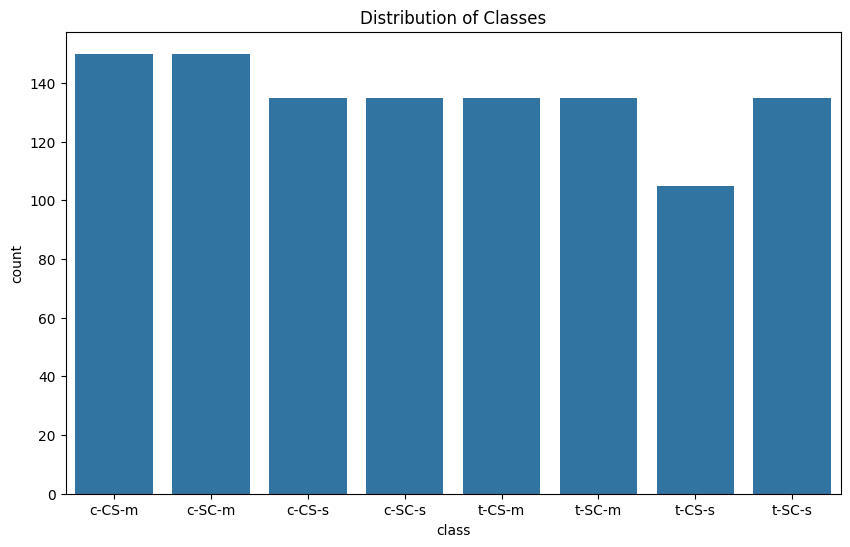

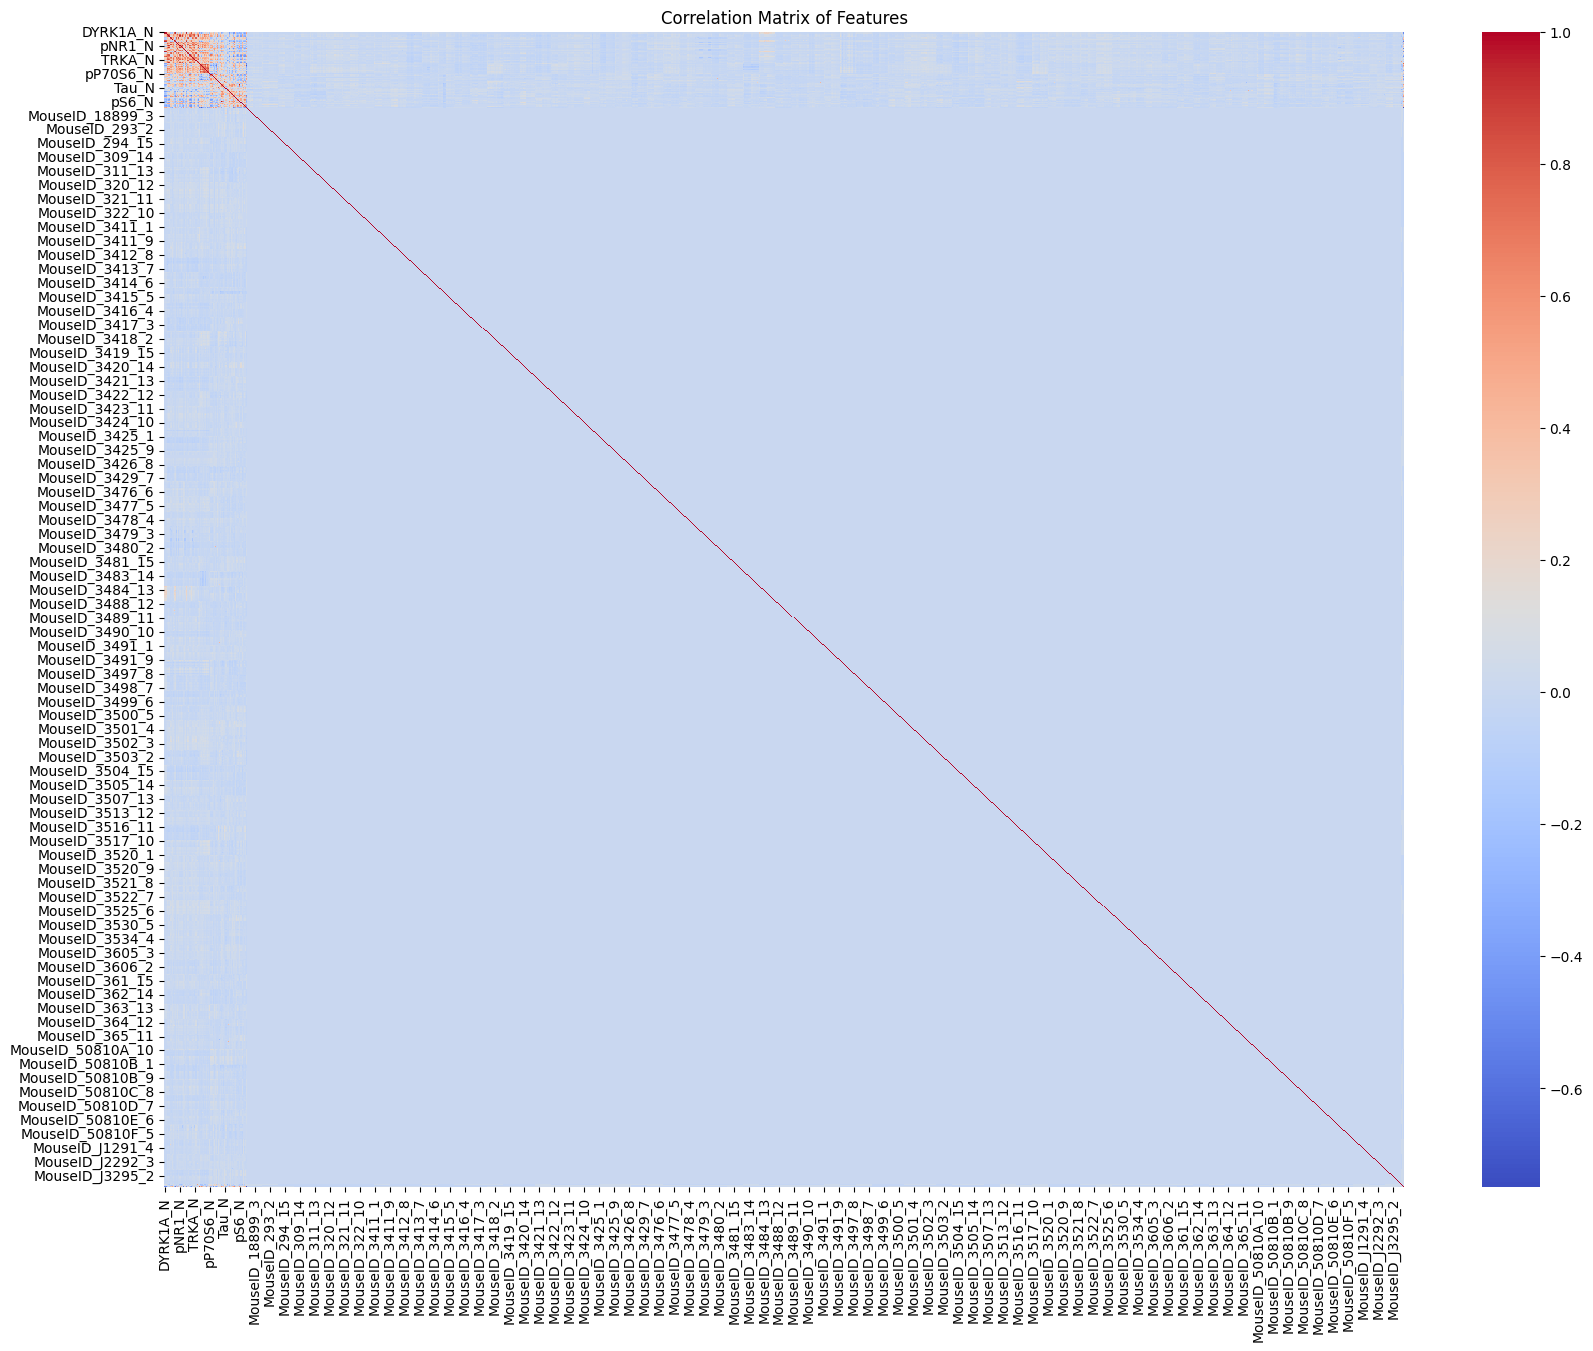

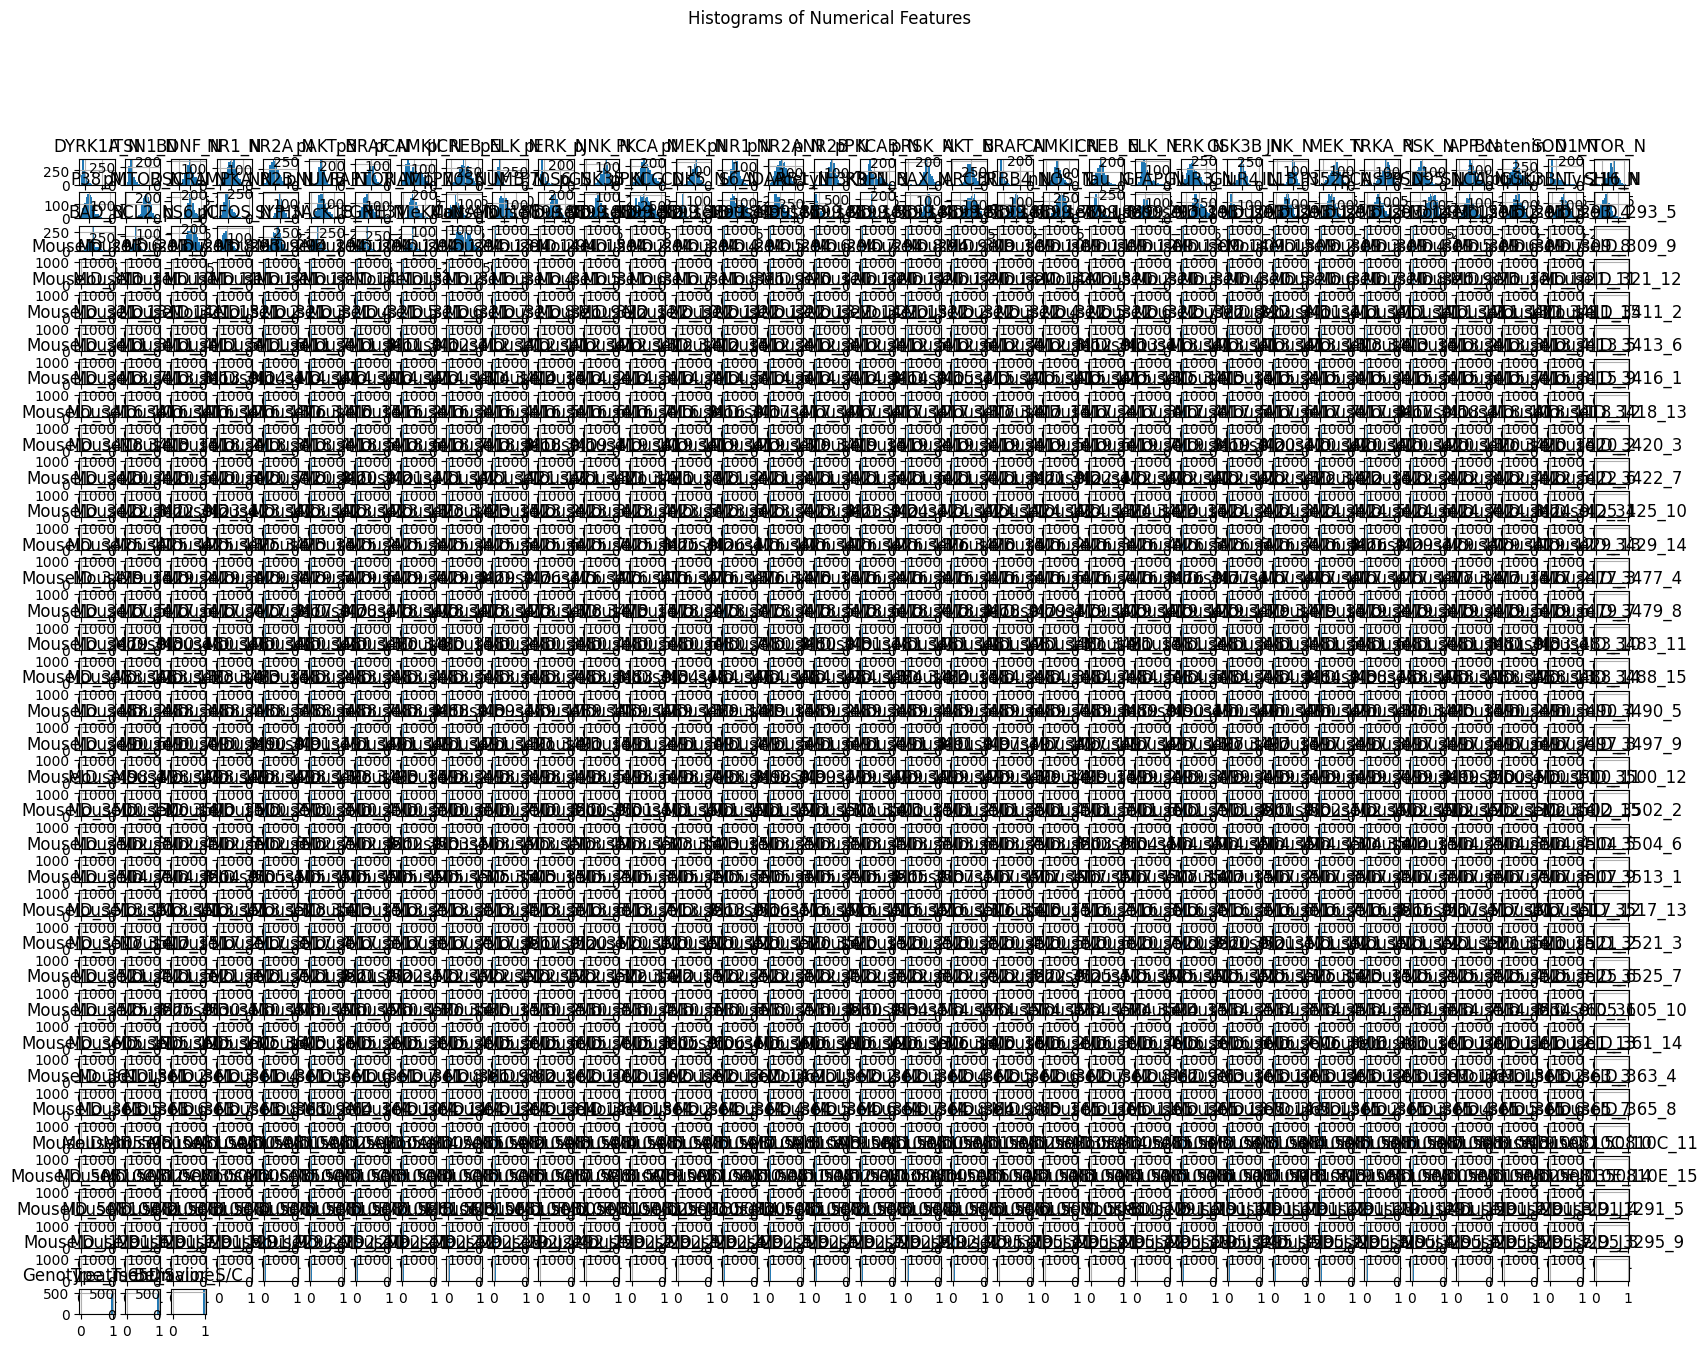

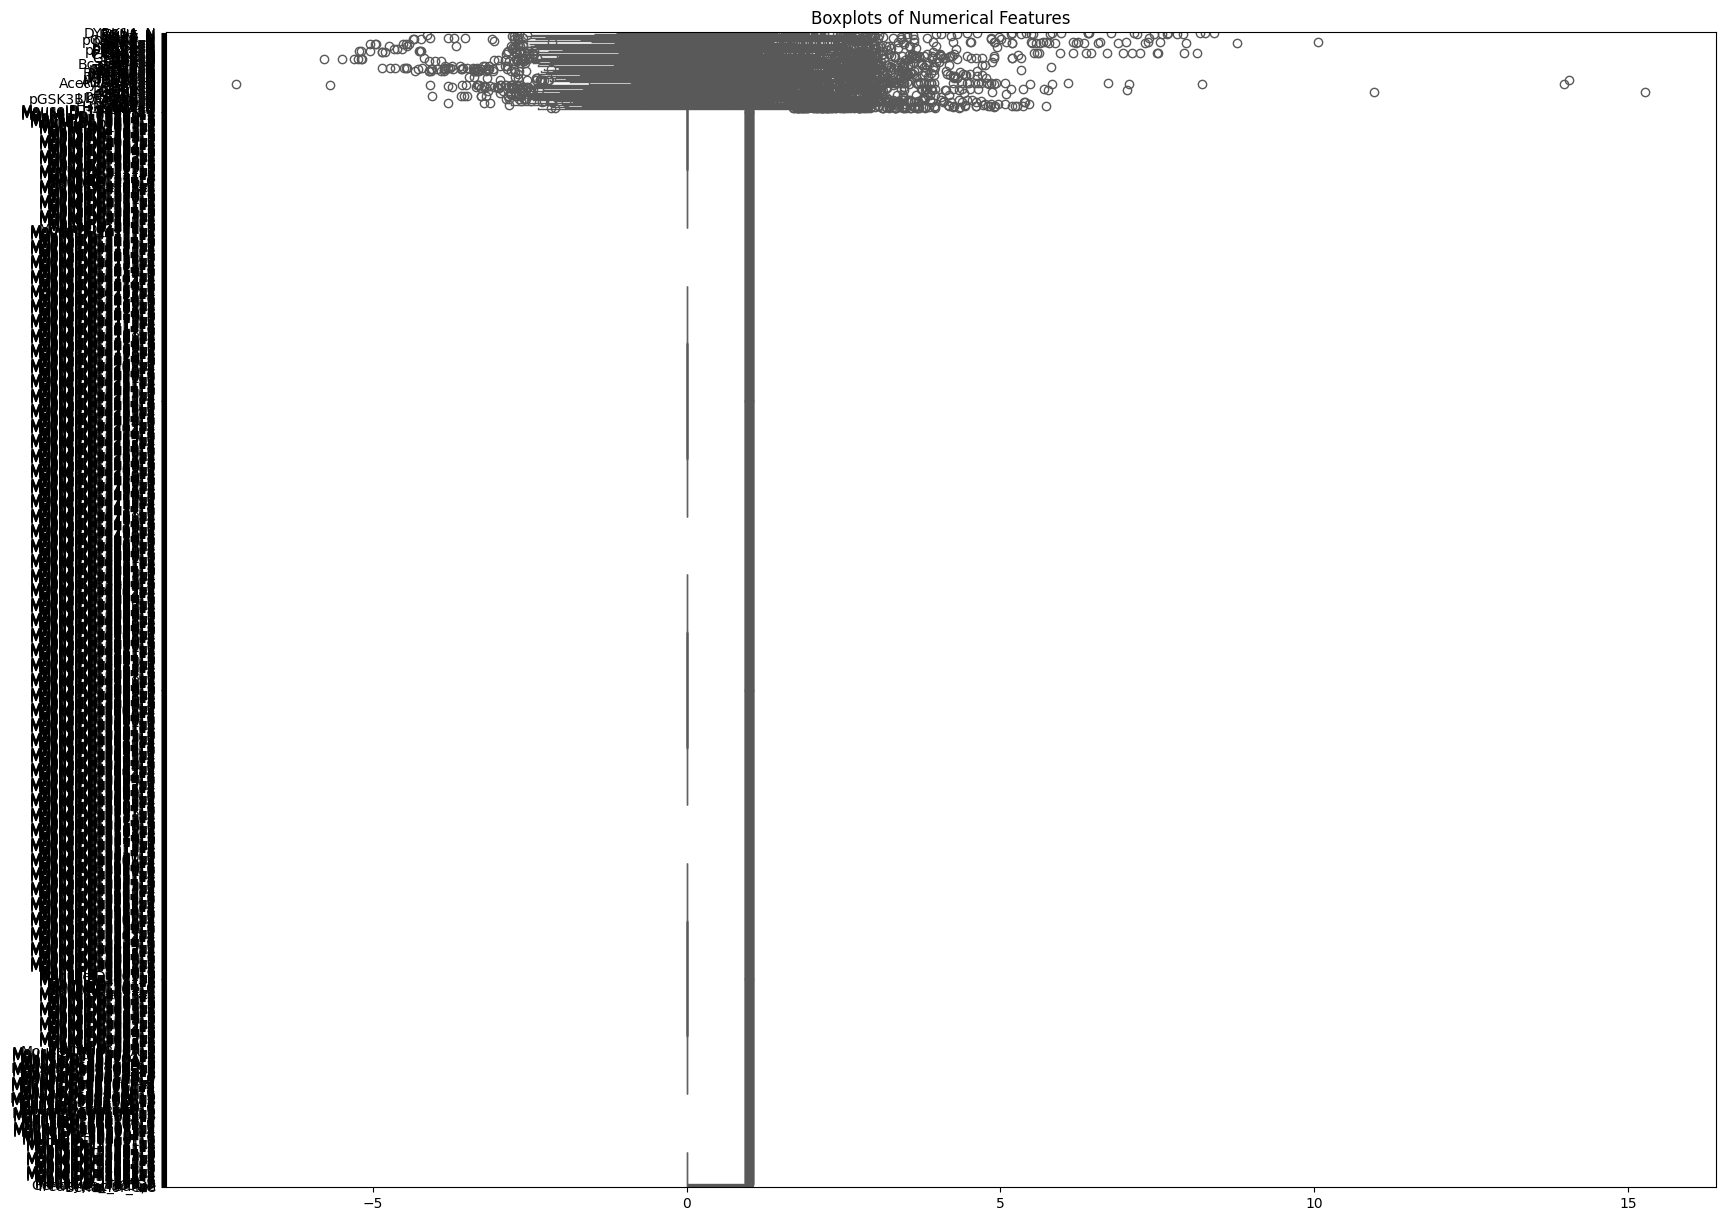

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Summary Statistics
print("Summary Statistics:\n", features.describe())

# Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(x=labels)
plt.title('Distribution of Classes')
plt.show()

# Correlation Matrix
plt.figure(figsize=(20, 15))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Histograms for Numerical Features
features.hist(figsize=(20, 15), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots for Numerical Features
plt.figure(figsize=(20, 15))
sns.boxplot(data=features, orient="h", palette="Set2")
plt.title('Boxplots of Numerical Features')
plt.show()

# STEP 3

#FEATURE SELECTION

In [ ]:
!pip install scikit-learn
# Data Pre-Processing

import numpy as np
import pandas as pd

# Import Data Seta

data_set=pd.read_csv("/content/Data_Cortex_Nuclear.csv")

# Extracting the Independent data variable

x=data_set.iloc[:,:-1]
print(x)
# Extracting the Dependent data variable

y=data_set.iloc[:,-1]
print(y)
#handling missing data (Replacing missing data with the mean value)


from sklearn.impute import SimpleImputer

numeric_columns = x.select_dtypes(include=np.number).columns

imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

#Fitting imputer object to the independent variables x.

imputer = imputer.fit(x[numeric_columns])

#Replacing missing data with the calculated mean value

x[numeric_columns] = imputer.transform(x[numeric_columns])
print(x[numeric_columns])

       MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...     pS6_N   pCFOS_N   

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Iterate over each column and apply LabelEncoder
for column in x.columns[:-1]:  # Exclude the last column
    label_encoder_x = LabelEncoder()
    x[column] = label_encoder_x.fit_transform(x[column])

print(x)

      MouseID  DYRK1A_N  ITSN1_N  BDNF_N  NR1_N  NR2A_N  pAKT_N  pBRAF_N  \
0          45       824      878    1051    998    1061     406      457   
1          52       844      798    1032    991    1036     325      379   
2          53       834      855    1042    936    1034     299      423   
3          54       742      666     864    736     945     447      436   
4          55       725      669     865    610     889     343      395   
...       ...       ...      ...     ...    ...     ...     ...      ...   
1075     1067       134      238      98    307      78     329      356   
1076     1068       198      273      87    384     133     756      541   
1077     1069        64       93      31     55      25     426      237   
1078     1070        51      133      57    115      39     298      394   
1079     1071       336      226     108    308      75     755      720   

      pCAMKII_N  pCREB_N  ...  pS6_N  pCFOS_N  SYP_N  H3AcK18_N  EGR1_N  \
0           

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
summary_stats = x.describe()
print(summary_stats)

          MouseID     DYRK1A_N      ITSN1_N       BDNF_N        NR1_N  \
count  1080.00000  1080.000000  1080.000000  1080.000000  1080.000000   
mean    539.50000   538.808333   538.400000   538.558333   538.500926   
std     311.91345   311.129860   310.709259   311.050375   311.047425   
min       0.00000     0.000000     0.000000     0.000000     0.000000   
25%     269.75000   269.750000   269.750000   269.750000   269.750000   
50%     539.50000   539.500000   539.500000   539.500000   539.000000   
75%     809.25000   807.250000   806.250000   807.250000   807.250000   
max    1079.00000  1077.000000  1076.000000  1077.000000  1077.000000   

            NR2A_N       pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N  ...  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000  ...   
mean    538.589815   538.038889   538.196296   538.600926   538.560185  ...   
std     311.054420   310.616026   310.623219   311.056258   311.050565  ...   
min       0.000000     0.0

In [ ]:
import matplotlib.pyplot as plt



# Assuming 'x' is your DataFrame with numeric columns already selected

# Increase the DPI for clearer plots
plt.rcParams['figure.dpi'] = 150

# Check available columns in your DataFrame
print(x.columns)  # Print the column names to verify if 'Protein1' exists

# Histogram for a specific feature
specific_protein = 'Protein1'  # Replace with the correct column name if needed

# Check if the column exists before plotting
if specific_protein in x.columns:
    plt.figure(figsize=(10, 6))
    x[specific_protein].hist(bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {specific_protein}')
    plt.xlabel(specific_protein)
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"Column '{specific_protein}' not found in the DataFrame.")

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior'],
      dtype='object')
Column 'Protein1' n

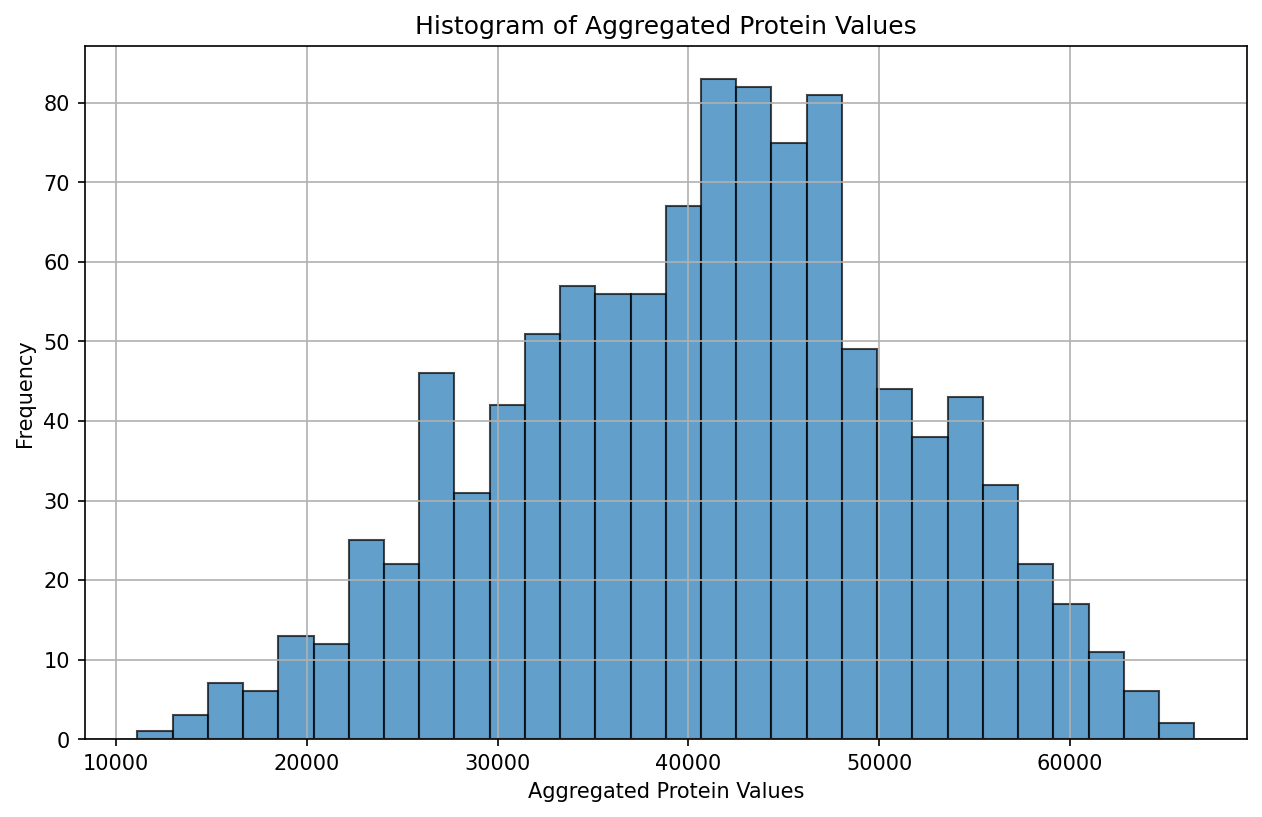

In [ ]:
# Histogram for aggregated protein values
sum_protein_values = x[numeric_columns].sum(axis=1)

plt.figure(figsize=(10, 6))
sum_protein_values.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Aggregated Protein Values')
plt.xlabel('Aggregated Protein Values')
plt.ylabel('Frequency')
plt.show()

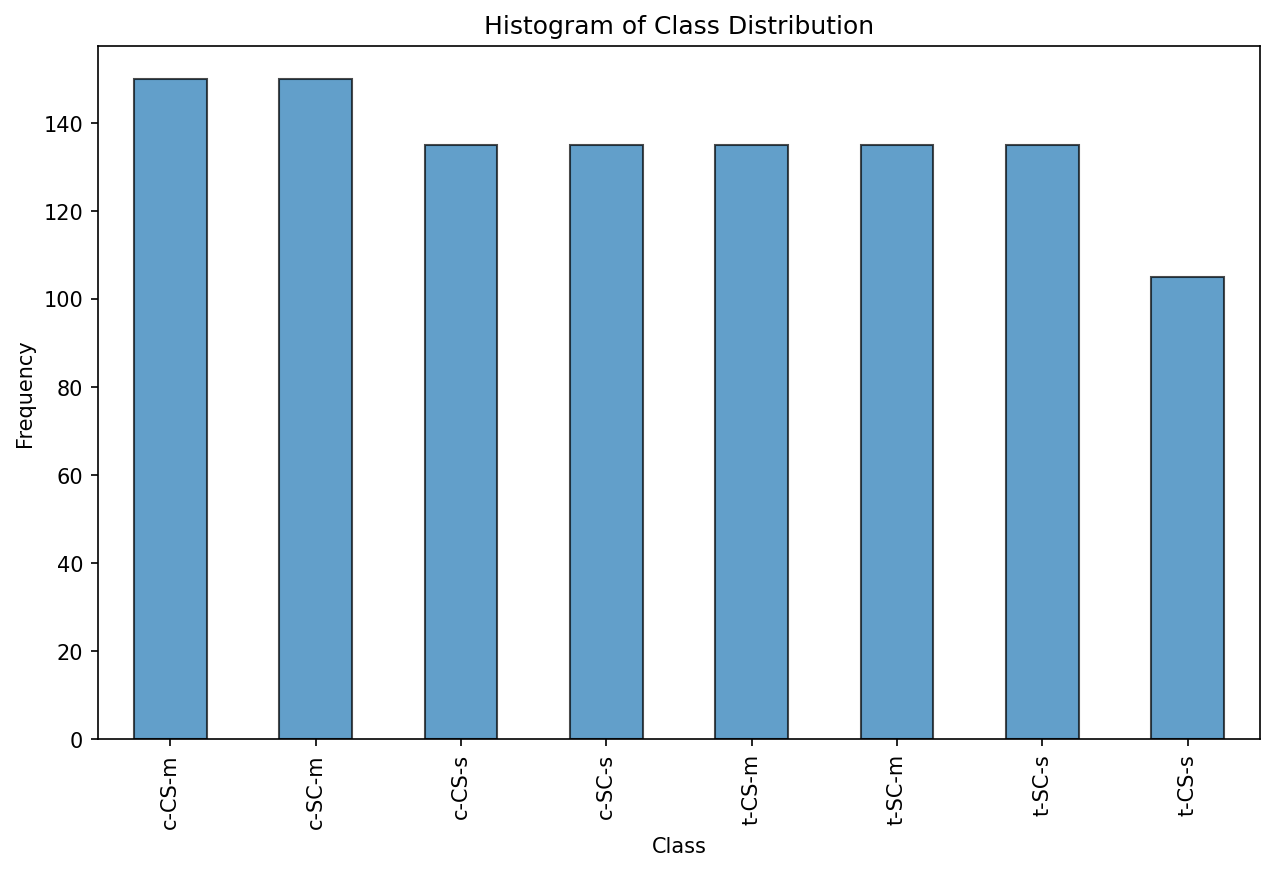

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y' contains the class labels
plt.figure(figsize=(10, 6))
y.value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Histogram of Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

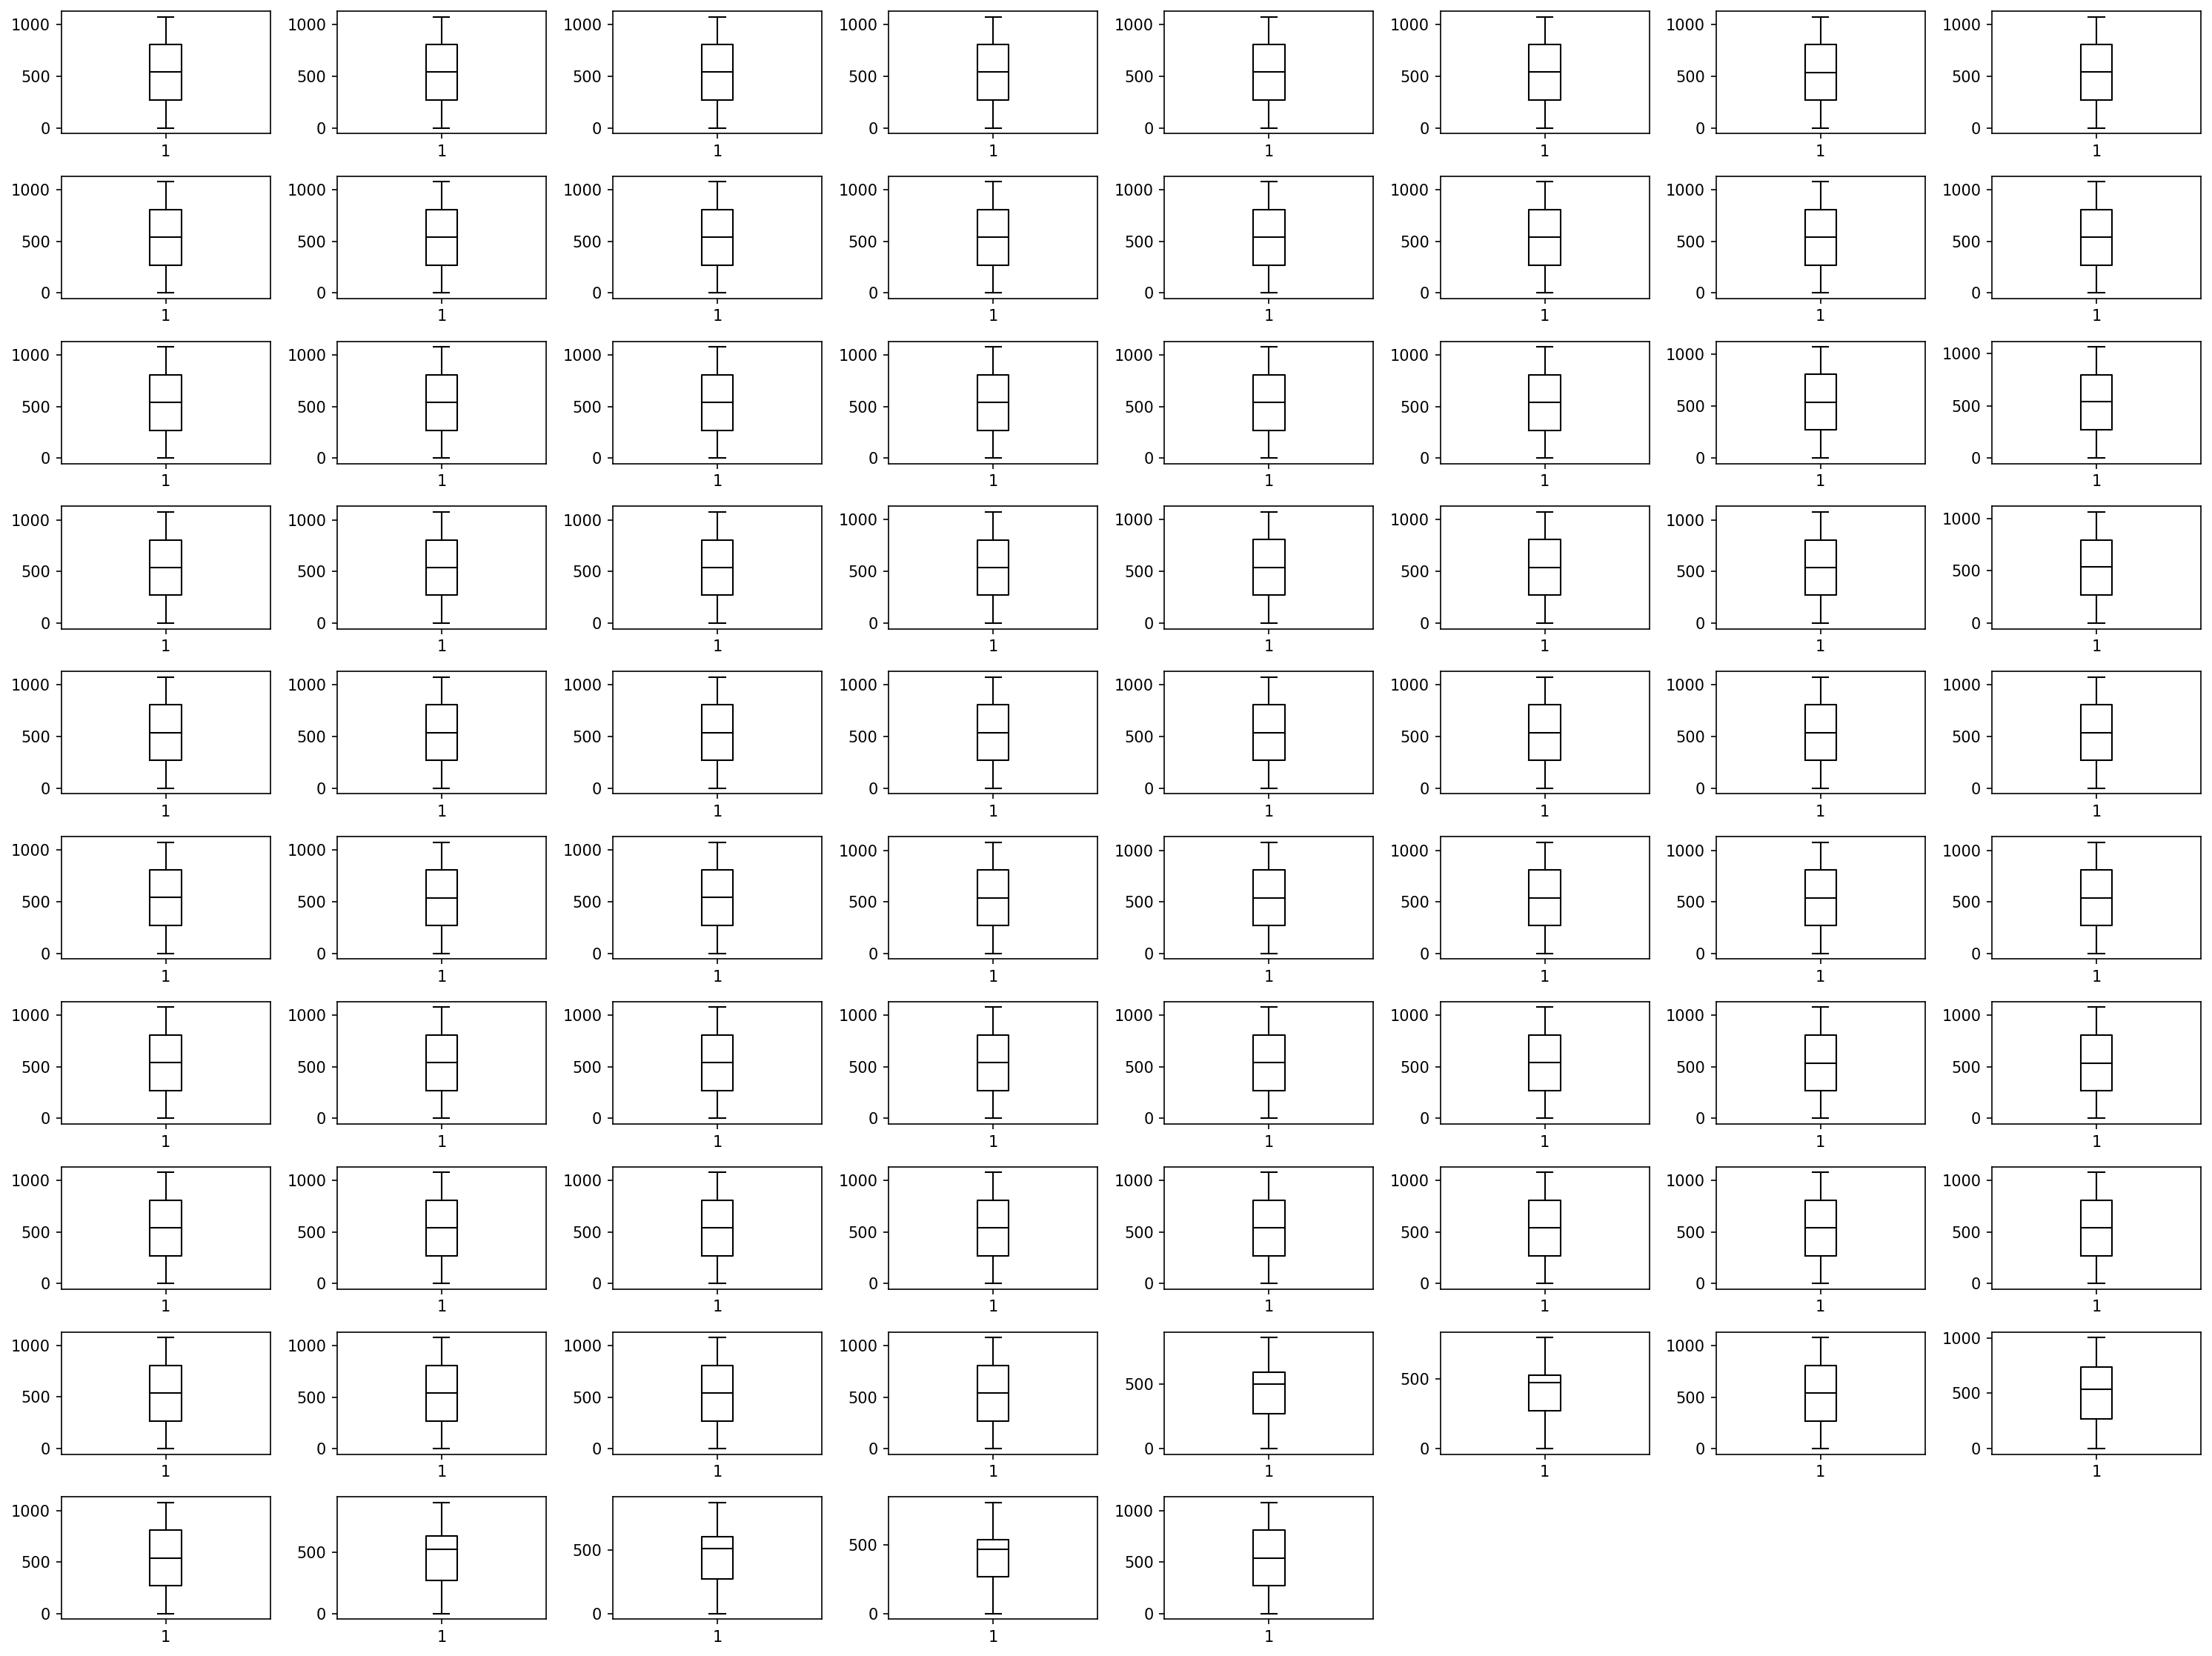

In [ ]:
# Box plots for numeric features
plt.figure(figsize=(20, 15))

# Iterate over numeric columns and create individual boxplots
for i, column in enumerate(numeric_columns):
    plt.subplot(10, 8, i + 1)  # Adjust layout as needed
    bp = plt.boxplot(x[column])

    # Set edgecolor for the box lines
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='black')

plt.tight_layout()
plt.show()

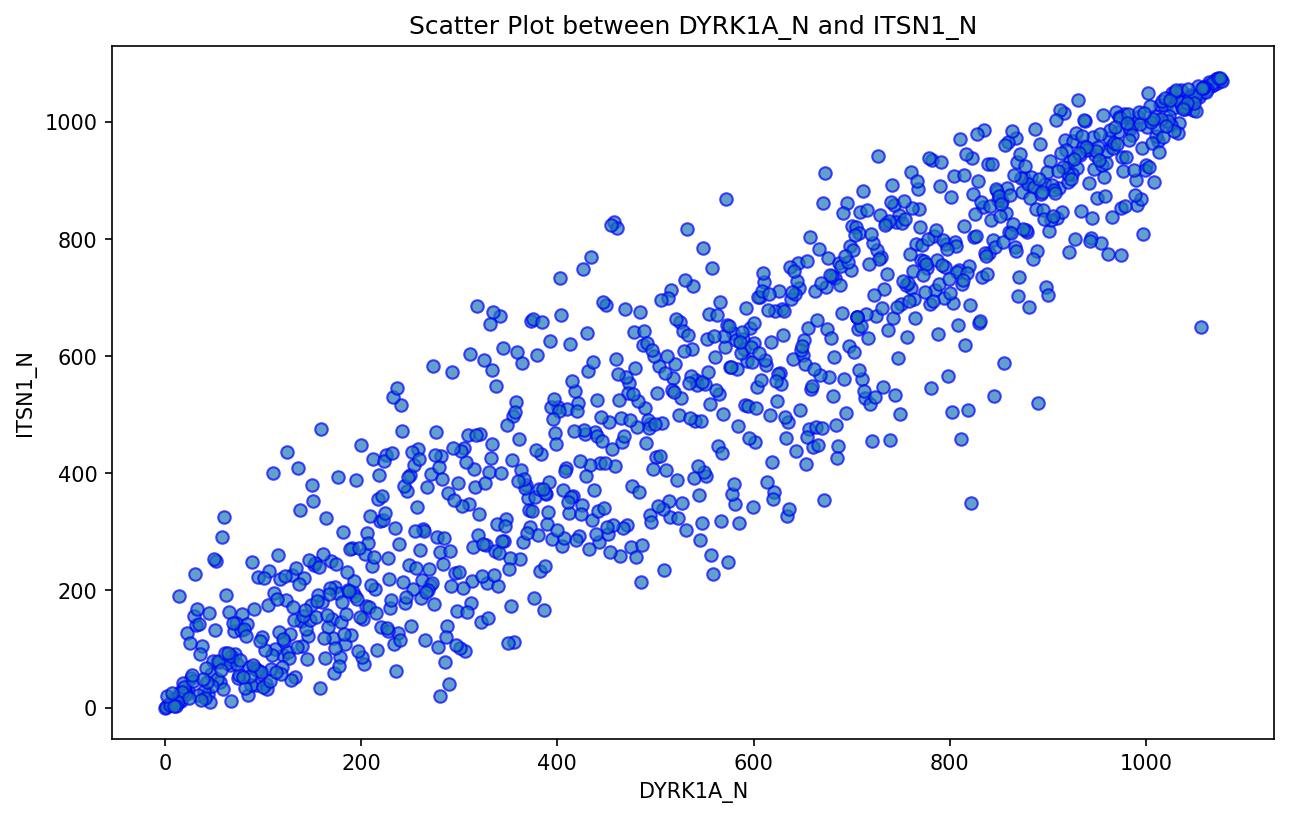

In [ ]:
# Scatter plot example between two proteins
plt.figure(figsize=(10, 6))
plt.scatter(x[numeric_columns[0]], x[numeric_columns[1]], alpha=0.7, edgecolors='b')
plt.title(f'Scatter Plot between {numeric_columns[0]} and {numeric_columns[1]}')
plt.xlabel(numeric_columns[0])
plt.ylabel(numeric_columns[1])
plt.show()

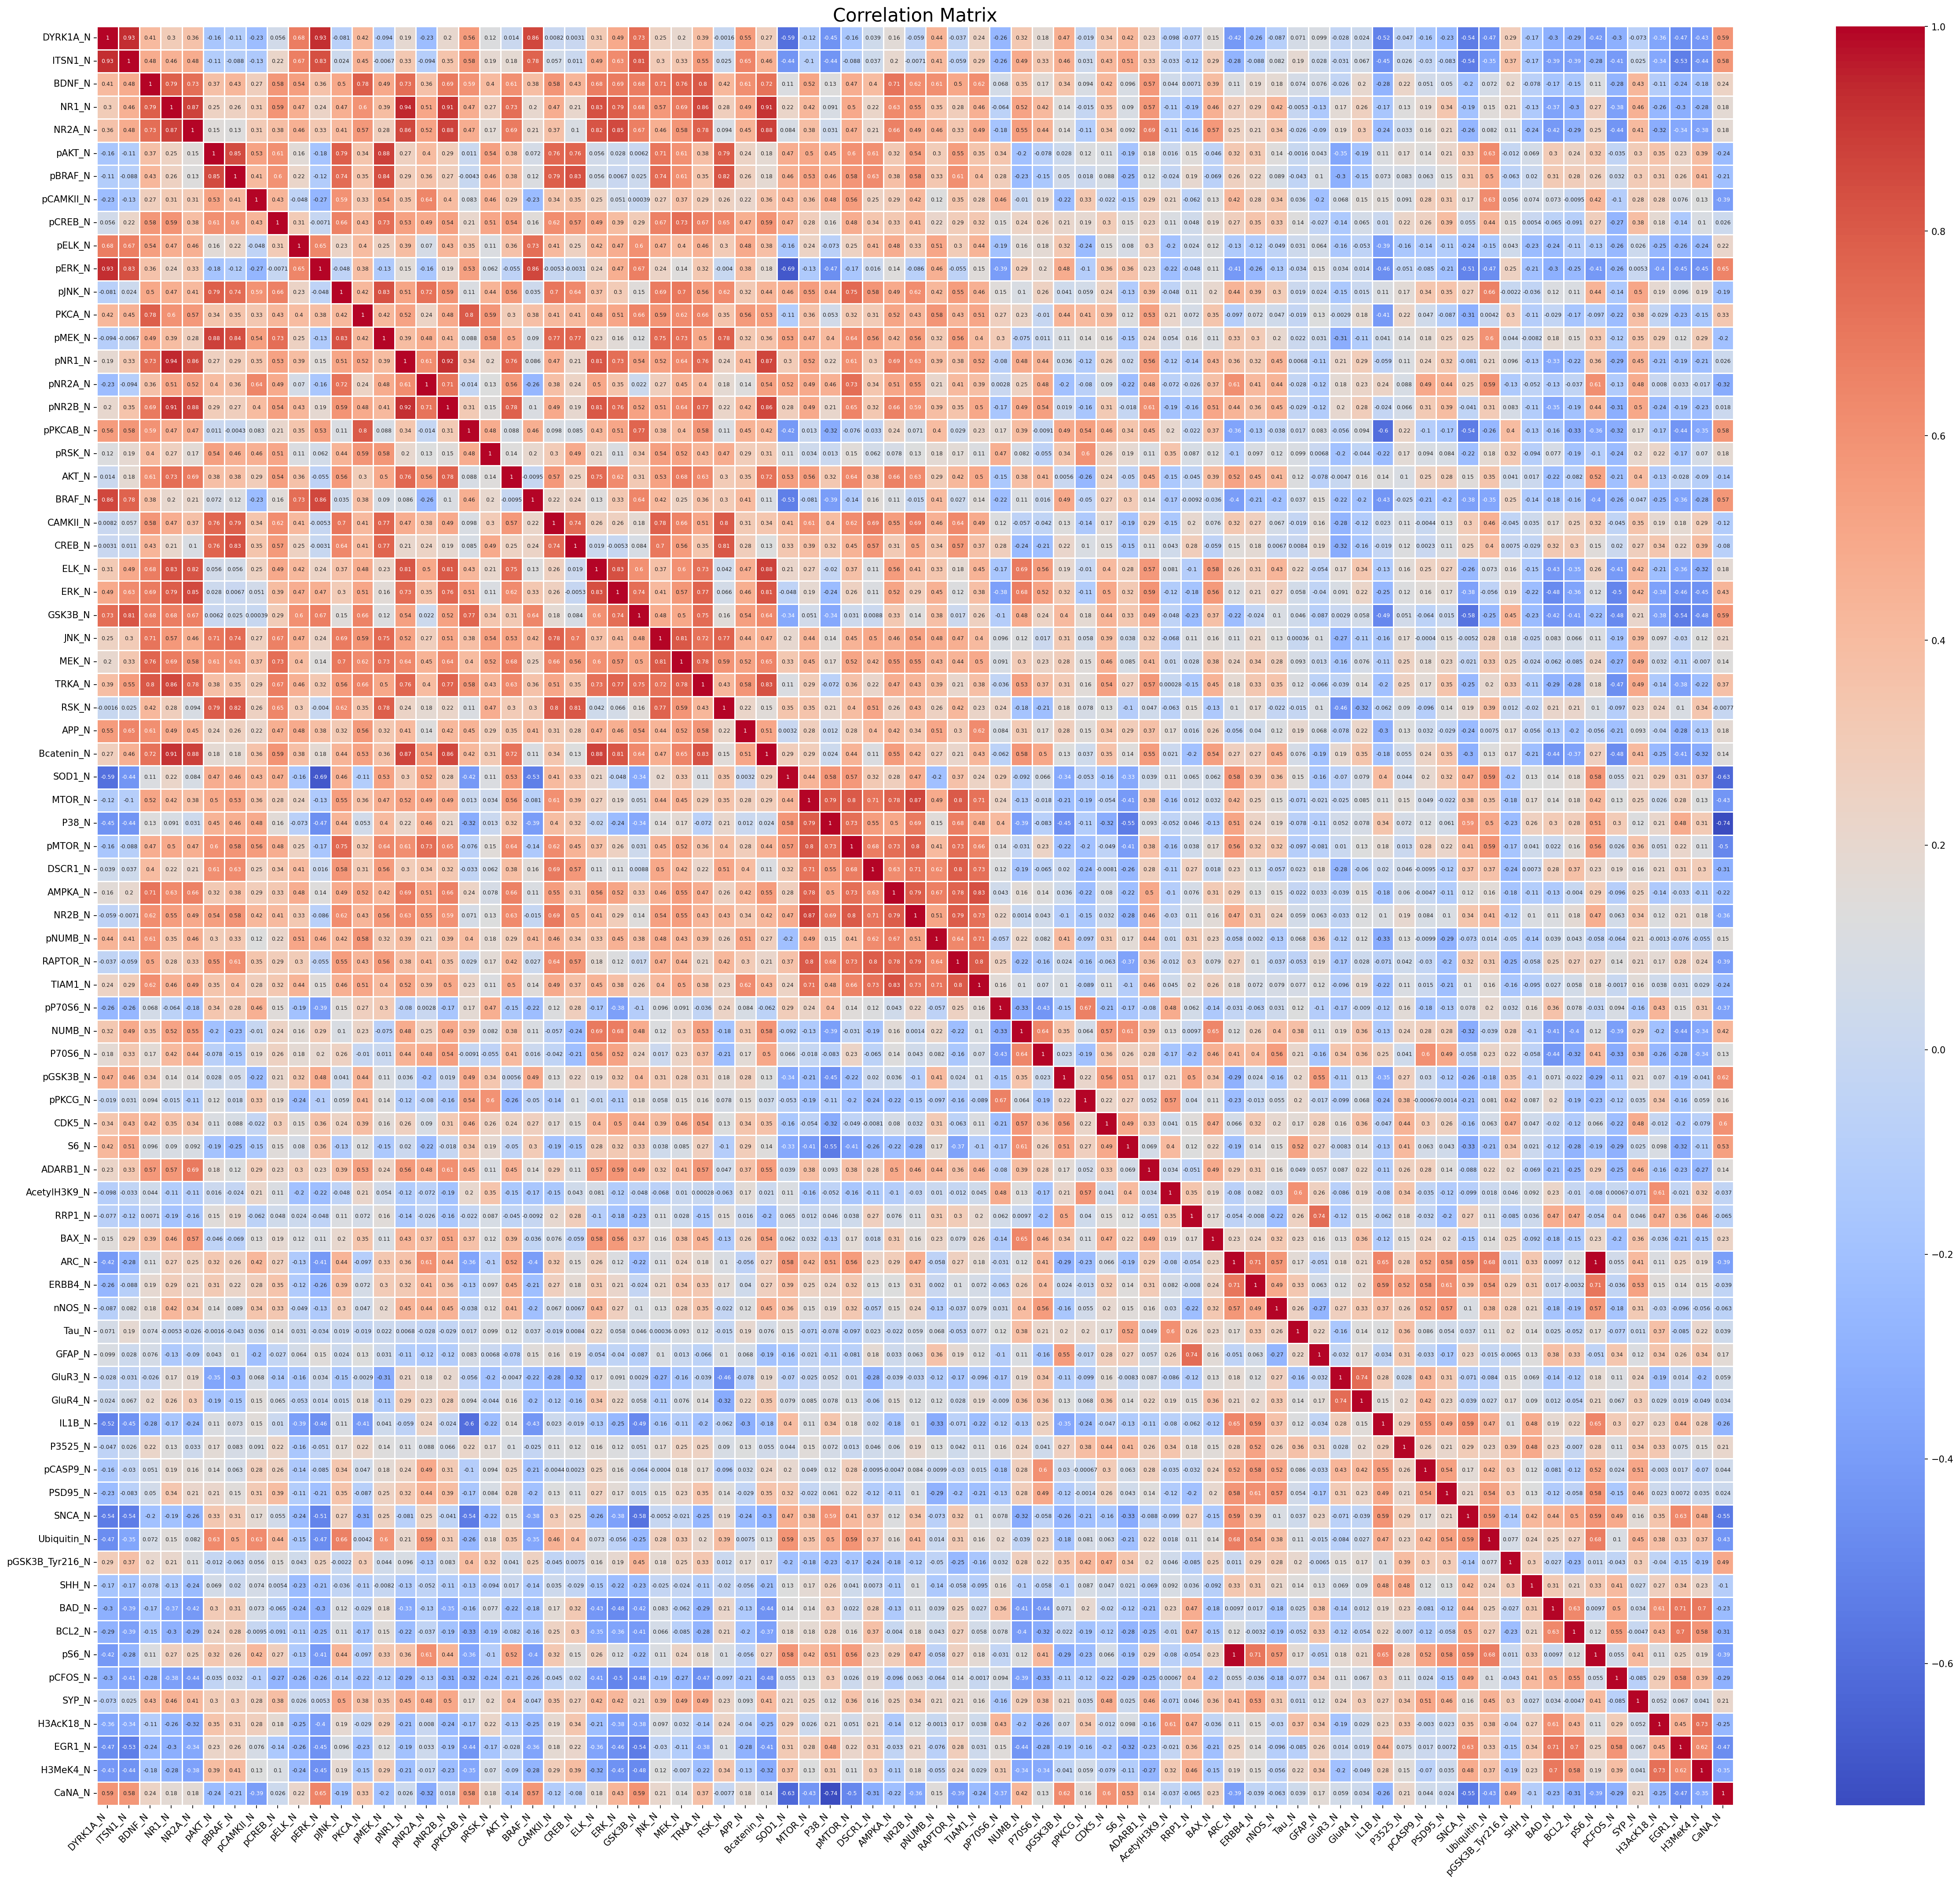

In [ ]:

# Correlation matrix
corr_matrix = x[numeric_columns].corr()

# Plotting the heatmap with adjusted figure size, rotated labels, and smaller font size
plt.figure(figsize=(40, 35))  # Increase the figure size
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 6})  # Reduce annotation size
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)
plt.title('Correlation Matrix', fontsize=20)
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information between each feature and the target variable
mi_scores = mutual_info_classif(x[numeric_columns], y)

# Create a DataFrame for better visualization
mi_scores_df = pd.DataFrame({'Feature': numeric_columns, 'Mutual Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information Scores:")
print(mi_scores_df)

Mutual Information Scores:
       Feature  Mutual Information
32      SOD1_N            0.820176
46     pPKCG_N            0.705186
10      pERK_N            0.667852
76      CaNA_N            0.551093
0     DYRK1A_N            0.521446
..         ...                 ...
31  Bcatenin_N            0.089192
52       BAX_N            0.088916
3        NR1_N            0.088108
16     pNR2B_N            0.084103
28      TRKA_N            0.081297

[77 rows x 2 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x[numeric_columns], y)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': numeric_columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance Scores from Random Forest:")
print(feature_importance_df)

Feature Importance Scores from Random Forest:
       Feature  Importance
32      SOD1_N    0.068097
10      pERK_N    0.037845
46     pPKCG_N    0.037715
30       APP_N    0.031129
76      CaNA_N    0.030987
..         ...         ...
6      pBRAF_N    0.004369
74      EGR1_N    0.004027
31  Bcatenin_N    0.003724
29       RSK_N    0.003509
71     pCFOS_N    0.003279

[77 rows x 2 columns]


#STEP 4
#MODEL TRAINING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load preprocessed features and labels
features = pd.read_csv('/content/preprocessed_features.csv')
labels = pd.read_csv('/content/preprocessed_labels.csv')

# Convert labels to a 1D array
labels = labels.values.ravel()

# Select top features based on mutual information and Random Forest importance scores
top_features = ['SOD1_N', 'pERK_N', 'CaNA_N', 'DYRK1A_N', 'ARC_N', 'pPKCG_N', 'APP_N', 'CaNA_N', 'NR2A_N', 'RSK_N']

# Select the top features from the dataset
features_top = features[top_features]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_top, labels, test_size=0.3, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
nn_model = MLPClassifier(max_iter=300, random_state=42)

# Hyperparameter tuning using GridSearchCV
# Random Forest parameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# SVM parameters
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Neural Network parameters
nn_params = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Perform GridSearchCV for each model
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
nn_grid = GridSearchCV(nn_model, nn_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the models
rf_grid.fit(x_train, y_train)
svm_grid.fit(x_train, y_train)
nn_grid.fit(x_train, y_train)

# Print the best parameters and best scores
print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest Best Score:", rf_grid.best_score_)

print("\nSVM Best Params:", svm_grid.best_params_)
print("SVM Best Score:", svm_grid.best_score_)

print("\nNeural Network Best Params:", nn_grid.best_params_)
print("Neural Network Best Score:", nn_grid.best_score_)


Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best Score: 0.9153886371558034

SVM Best Params: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Score: 0.9510892296967585

Neural Network Best Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 100), 'learning_rate': 'constant', 'solver': 'adam'}
Neural Network Best Score: 0.9272830254444058


## FINE-TUNING (Similar results as we are already using optimal parameters)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define a narrower range of hyperparameters for Random Forest
rf_params_fine = {
    'n_estimators': [40, 50, 60],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Perform RandomizedSearchCV with more iterations
rf_random_search = RandomizedSearchCV(rf_model, rf_params_fine, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_random_search.fit(x_train, y_train)

print("Random Forest Best Params (Fine-Tuned):", rf_random_search.best_params_)
print("Random Forest Best Score (Fine-Tuned):", rf_random_search.best_score_)


# Define a narrower range of hyperparameters for SVM
svm_params_fine = {
    'C': [50, 100, 200],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

# Perform RandomizedSearchCV with more iterations
svm_random_search = RandomizedSearchCV(svm_model, svm_params_fine, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
svm_random_search.fit(x_train, y_train)

print("SVM Best Params (Fine-Tuned):", svm_random_search.best_params_)
print("SVM Best Score (Fine-Tuned):", svm_random_search.best_score_)

# Define a narrower range of hyperparameters for Neural Network
nn_params_fine = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Perform RandomizedSearchCV with more iterations
nn_random_search = RandomizedSearchCV(nn_model, nn_params_fine, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
nn_random_search.fit(x_train, y_train)

print("Neural Network Best Params (Fine-Tuned):", nn_random_search.best_params_)
print("Neural Network Best Score (Fine-Tuned):", nn_random_search.best_score_)


Random Forest Best Params (Fine-Tuned): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Random Forest Best Score (Fine-Tuned): 0.9153886371558034


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM Best Params (Fine-Tuned): {'kernel': 'rbf', 'gamma': 'scale', 'C': 100}
SVM Best Score (Fine-Tuned): 0.9510892296967585


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Neural Network Best Params (Fine-Tuned): {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50, 100), 'alpha': 0.0001, 'activation': 'relu'}
Neural Network Best Score (Fine-Tuned): 0.9272830254444058


## Expanded Grid Search (Similar results again)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a broader range of hyperparameters for Random Forest
rf_params_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
rf_grid_search = GridSearchCV(rf_model, rf_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(x_train, y_train)

print("Random Forest Best Params (Grid Search):", rf_grid_search.best_params_)
print("Random Forest Best Score (Grid Search):", rf_grid_search.best_score_)

# Define a broader range of hyperparameters for SVM
svm_params_grid = {
    'C': [10, 50, 100, 200],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Perform GridSearchCV
svm_grid_search = GridSearchCV(svm_model, svm_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(x_train, y_train)

print("SVM Best Params (Grid Search):", svm_grid_search.best_params_)
print("SVM Best Score (Grid Search):", svm_grid_search.best_score_)


# Define a range of hyperparameters for Neural Network
nn_params_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Perform GridSearchCV
nn_grid_search = GridSearchCV(nn_model, nn_params_grid, cv=5, scoring='accuracy', n_jobs=-1)
nn_grid_search.fit(x_train, y_train)

print("Neural Network Best Params (Grid Search):", nn_grid_search.best_params_)
print("Neural Network Best Score (Grid Search):", nn_grid_search.best_score_)


Random Forest Best Params (Grid Search): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Best Score (Grid Search): 0.9167131404670616
SVM Best Params (Grid Search): {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Score (Grid Search): 0.9510892296967585
Neural Network Best Params (Grid Search): {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 100), 'learning_rate': 'constant', 'solver': 'adam'}
Neural Network Best Score (Grid Search): 0.9272830254444058


## Repeated Cross Validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed data
features = pd.read_csv('/content/preprocessed_features.csv')
labels = pd.read_csv('/content/preprocessed_labels.csv')

# Convert labels to a numpy array
y = labels.values.ravel()

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, random_state=42)

# Define the number of splits and repeats
n_splits = 7
n_repeats = 5

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Lists to store the results
accuracies = []

# Perform repeated cross-validation
for train_index, test_index in cv.split(features, y):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame({
    'Fold': np.arange(1, len(accuracies) + 1),
    'Accuracy': accuracies
})

# Print results
print("Repeated Cross-Validation Results:")
print(results_df)

# Print average accuracy
print("\nAverage Accuracy:", np.mean(accuracies))
print("Standard Deviation of Accuracy:", np.std(accuracies))


Repeated Cross-Validation Results:
    Fold  Accuracy
0      1  1.000000
1      2  1.000000
2      3  1.000000
3      4  1.000000
4      5  0.993506
5      6  1.000000
6      7  1.000000
7      8  1.000000
8      9  0.993548
9     10  1.000000
10    11  0.987013
11    12  1.000000
12    13  1.000000
13    14  1.000000
14    15  1.000000
15    16  1.000000
16    17  0.993506
17    18  0.993506
18    19  0.993506
19    20  1.000000
20    21  1.000000
21    22  1.000000
22    23  1.000000
23    24  1.000000
24    25  1.000000
25    26  1.000000
26    27  1.000000
27    28  1.000000
28    29  1.000000
29    30  1.000000
30    31  0.987013
31    32  0.993506
32    33  1.000000
33    34  0.993506
34    35  1.000000

Average Accuracy: 0.9979603806331917
Standard Deviation of Accuracy: 0.0037276588997038193


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score

# Load the preprocessed data
features = pd.read_csv('/content/preprocessed_features.csv')
labels = pd.read_csv('/content/preprocessed_labels.csv')

# Convert labels to a numpy array
y = labels.values.ravel()

# Initialize SVM model
model = SVC(kernel='rbf', C=100, gamma='scale', random_state=42)

# Define the number of splits and repeats
n_splits = 5
n_repeats = 3

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Lists to store the results
accuracies = []

# Perform repeated cross-validation
for train_index, test_index in cv.split(features, y):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame({
    'Fold': np.arange(1, len(accuracies) + 1),
    'Accuracy': accuracies
})

# Print results
print("Repeated Cross-Validation Results for SVM:")
print(results_df)

# Print average accuracy
print("\nAverage Accuracy:", np.mean(accuracies))
print("Standard Deviation of Accuracy:", np.std(accuracies))


Repeated Cross-Validation Results for SVM:
    Fold  Accuracy
0      1  1.000000
1      2  0.995370
2      3  1.000000
3      4  1.000000
4      5  0.995370
5      6  1.000000
6      7  1.000000
7      8  0.995370
8      9  1.000000
9     10  0.981481
10    11  1.000000
11    12  1.000000
12    13  0.995370
13    14  0.995370
14    15  1.000000

Average Accuracy: 0.9972222222222221
Standard Deviation of Accuracy: 0.00472131436443776


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score

# Load the preprocessed data
features = pd.read_csv('/content/preprocessed_features.csv')
labels = pd.read_csv('/content/preprocessed_labels.csv')

# Convert labels to a numpy array
y = labels.values.ravel()

# Initialize Neural Network model
model = MLPClassifier(
    hidden_layer_sizes=(100, 50, 100),
    activation='relu',
    alpha=0.0001,
    learning_rate='constant',
    solver='adam',
    random_state=42
)

# Define the number of splits and repeats
n_splits = 5
n_repeats = 3

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Lists to store the results
accuracies = []

# Perform repeated cross-validation
for train_index, test_index in cv.split(features, y):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame({
    'Fold': np.arange(1, len(accuracies) + 1),
    'Accuracy': accuracies
})

# Print results
print("Repeated Cross-Validation Results for Neural Network:")
print(results_df)

# Print average accuracy
print("\nAverage Accuracy:", np.mean(accuracies))
print("Standard Deviation of Accuracy:", np.std(accuracies))


Repeated Cross-Validation Results for Neural Network:
    Fold  Accuracy
0      1   1.00000
1      2   1.00000
2      3   0.99537
3      4   1.00000
4      5   0.99537
5      6   1.00000
6      7   1.00000
7      8   0.99537
8      9   1.00000
9     10   0.99537
10    11   0.99537
11    12   1.00000
12    13   0.99537
13    14   0.99537
14    15   1.00000

Average Accuracy: 0.9978395061728395
Standard Deviation of Accuracy: 0.0023096650535641716


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        30
      c-CS-s       1.00      1.00      1.00        27
      c-SC-m       1.00      1.00      1.00        30
      c-SC-s       1.00      1.00      1.00        27
      t-CS-m       1.00      1.00      1.00        27
      t-CS-s       1.00      1.00      1.00        21
      t-SC-m       1.00      1.00      1.00        27
      t-SC-s       1.00      1.00      1.00        27

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

